# Proyecto ML. Show/ No Show

In [1]:
#Import your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
plt.rcParams["figure.figsize"] = (6,4)

## Import and Describe the Dataset

In [2]:
citas = pd.read_csv('../data/show_no_show.csv')

In [3]:
citas.columns = map(str.lower, citas.columns)

In [4]:
#Look at the first five rows of all variables to evaluate the categorical variables as well
citas.head()

,unnamed: 0,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,None,0,0,No
1,1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,None,0,0,No
2,2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,None,0,0,No
3,3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,None,0,0,No
4,4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,None,0,0,No


In [5]:
#Look at the variables and their types
citas.dtypes

unnamed: 0          int64
patientid         float64
appointmentid       int64
gender             object
scheduledday       object
appointmentday     object
age                 int64
neighbourhood      object
scholarship         int64
hipertension        int64
diabetes            int64
alcoholism         object
handcap             int64
sms_received        int64
no-show            object
dtype: object

In [6]:
#Examine the descriptive statistics of the numeric variables
citas.describe()

,unnamed: 0,patientid,appointmentid,age,scholarship,hipertension,diabetes,handcap,sms_received
count,110527.000000,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,55263.000000,1.474963e+14,5.675305e+06,37.049029,0.098266,0.197246,0.071865,0.022248,0.321026
std,31906.540939,2.560949e+14,7.129575e+04,23.524663,0.297675,0.397921,0.258265,0.161543,0.466873
min,0.000000,3.921784e+04,5.030230e+06,-232.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27631.500000,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55263.000000,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82894.500000,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,110526.000000,9.999816e+14,5.790484e+06,310.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Handle the Missing Data

In [7]:
citas.isnull().any(axis=1).sum()

345

In [8]:
missing_values = citas[citas.isnull().any(axis=1)]
missing_values.head()

,unnamed: 0,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
73,73,4.542132e+13,5552934,NaN,2016-04-06T18:12:38Z,2016-04-29T00:00:00Z,68,REPÚBLICA,0,1,1,None,0,1,No
416,416,3.987252e+14,5496971,NaN,2016-03-21T15:22:03Z,2016-04-29T00:00:00Z,32,ITARARÉ,0,0,0,None,0,1,No
603,603,7.351714e+14,5504986,NaN,2016-03-23T08:42:08Z,2016-04-29T00:00:00Z,58,ITARARÉ,0,0,0,None,0,1,No
725,725,3.498990e+11,5638769,NaN,2016-04-29T08:24:02Z,2016-04-29T00:00:00Z,68,CENTRO,0,1,0,None,0,0,No
738,738,2.385829e+12,5638933,NaN,2016-04-29T08:36:00Z,2016-04-29T00:00:00Z,3,JABOUR,0,0,0,None,0,0,No


## Data transformation

In [9]:
citas['patientid'] = citas['patientid'].astype(int)

In [10]:
citas.head()

,unnamed: 0,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,None,0,0,No
1,1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,None,0,0,No
2,2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,None,0,0,No
3,3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,None,0,0,No
4,4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,None,0,0,No


### Fechas y horas

In [11]:
citas['scheduledday'] = pd.to_datetime(citas['scheduledday'].str.replace('T',' ').str.replace('Z',''))
citas['appointmentday'] = pd.to_datetime(citas['appointmentday'].str.replace('T',' ').str.replace('Z',''))

In [12]:
citas['scheduleddate'] = citas['scheduledday'].dt.date
citas['scheduledweekday'] = citas['scheduledday'].dt.weekday #Monday 0 Sunday 6
citas['scheduledhour'] = citas['scheduledday'].dt.hour

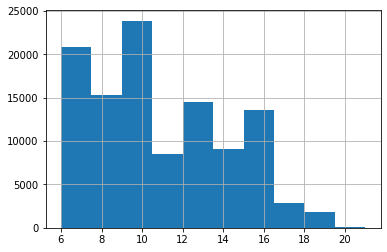

In [13]:
citas['scheduledhour'].hist()

### Agrupaciones para simplificar horas, handcap, alcoholism

In [14]:
def date_group(hour):
    if 6 <= hour > 11:
        return 1
    elif 11 <= hour > 15:
        return 2
    elif 15 <= hour > 22:
        return 3
    else:
        return 0

In [15]:
def handcap_group(value):
    if value > 0 :
        return 1
    else:
        return 0

In [16]:
def alcohol_group(value):
    if value == 'None' :
        return 0
    else:
        return 1

In [17]:
citas['schedulehourgroup'] = citas['scheduledhour'].apply(date_group)
citas['alcoholgroup'] = citas['alcoholism'].apply(alcohol_group)
citas['handcapgroup'] = citas['handcap'].apply(handcap_group)


In [18]:
citas.head()

,unnamed: 0,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,...,alcoholism,handcap,sms_received,no-show,scheduleddate,scheduledweekday,scheduledhour,schedulehourgroup,alcoholgroup,handcapgroup
0,0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,...,None,0,0,No,2016-04-29,4,18,1,0,0
1,1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,...,None,0,0,No,2016-04-29,4,16,1,0,0
2,2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,...,None,0,0,No,2016-04-29,4,16,1,0,0
3,3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,...,None,0,0,No,2016-04-29,4,17,1,0,0
4,4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,...,None,0,0,No,2016-04-29,4,16,1,0,0


### Pasar categoricas a numericas

In [19]:
def cat_ord_to_num (df, col, lst):

    """
    Convierte una categórica ordinal en numérica manteniendo el orden.

    Input:
    * df : dataframe
    * col: columna a convertir
    * lst : lista ordenada de valores únicos de la columna a convertir

    Output:
    *new_col :lista con los valores convertidos

    """

    new_col = df[col].apply(lambda x: lst.index(x))

    return new_col

In [21]:
order = ["None", "Low", "Moderate", "High"]
citas['alcoholism_num'] = cat_ord_to_num (citas, "alcoholism", order)

In [22]:
citas['no-show-num'] = citas['no-show'].apply(lambda x: 1 if x == 'Yes' else 0)

### Limpiar Age y sus Outliers

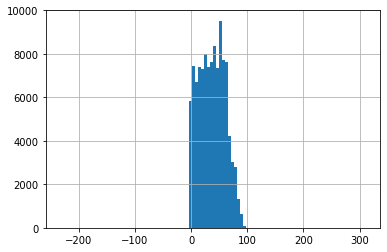

In [23]:
citas['age'].hist(bins=100)

In [24]:
#Cuantos appointmentids tiene cada paciente con la misma edad

ages = citas.groupby(['patientid','age']).agg({'appointmentid':'count'}).reset_index().sort_values('patientid')
ages.head()

,patientid,age,appointmentid
0,39217,44,1
1,43741,39,1
2,93779,33,1
3,141724,12,1
4,537615,14,1


In [25]:
#Pacientes que tienen appointments ids con distintas edades
ages_dup = ages[ages.duplicated('patientid',keep=False)].sort_values('patientid')

patient_dup = pd.DataFrame(ages_dup['patientid'].unique())
#si hay mas de un appointment id poner esa edad en el resto
#si ha mas de dos edades mirar las que la diferencia es mayor que uno

In [26]:
ages_dup.head()

,patientid,age,appointmentid
7,22638656,22,1
8,22638656,23,1
103,1217364296,48,1
104,1217364296,49,3
108,1269422141,51,1


In [27]:
#more than 1 appointment with same age (este ya deberia ser definitvo)
more_than_1_app = ages_dup[ages_dup['appointmentid']>1]

more_than_1_app = more_than_1_app.rename(columns=({'age':'new_age'}))

more_than_1_app.head()

,patientid,new_age,appointmentid
104,1217364296,49,3
133,1611158895,7,2
191,2522418752,55,2
190,2522418752,54,2
263,3939378315,0,3


In [28]:
def age_review(maxv,minv,mean):
    if minv < 0:
        return maxv
    elif maxv > 100:
        return minv
    else:
        return mean

In [29]:
#sea 1 y no este en la lista anterior
y = ages_dup[~ages_dup['patientid'].isin(more_than_1_app['patientid'])]

y = y.groupby(['patientid'])['age'].agg(['max','min','mean']).reset_index()

y['diff']=y['max']-y['min']

y['new_age'] = y[y['diff']>1].apply(lambda x: age_review(x['max'],x['min'],x['mean']),axis=1)


In [30]:
new_age = more_than_1_app[['patientid','new_age']].append(y[['patientid','new_age']])

In [31]:
citas = citas.merge(new_age[['patientid','new_age']],
                               left_on = ['patientid'],right_on = ['patientid'],how='left')


In [32]:
citas.head()

,unnamed: 0,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,...,no-show,scheduleddate,scheduledweekday,scheduledhour,schedulehourgroup,alcoholgroup,handcapgroup,alcoholism_num,no-show-num,new_age
0,0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,...,No,2016-04-29,4,18,1,0,0,0,0,NaN
1,1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,...,No,2016-04-29,4,16,1,0,0,0,0,NaN
2,2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,...,No,2016-04-29,4,16,1,0,0,0,0,NaN
3,3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,...,No,2016-04-29,4,17,1,0,0,0,0,NaN
4,4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,...,No,2016-04-29,4,16,1,0,0,0,0,NaN


Para los que no hemos conseguido corregir la edad usar la columna age y siempre en valor absoluto

In [33]:
citas['new_age'] = citas.apply(lambda x: abs(x['age']) if pd.isnull(x['new_age']) else x['new_age'],axis=1)

Quitar los outliners

In [34]:
Q1 = citas['new_age'].quantile(0.25) 

Q3 = citas['new_age'].quantile(0.75) 

IQR = citas['new_age'].quantile(0.75) - citas['new_age'].quantile(0.25)

#((citas['new_age']< (Q1- 1.5*IQR))|((citas['new_age']> (Q3+ 1.5*IQR)))).sum()

#Outliers

In [35]:
#remove_outliers

citas = citas[(citas['new_age'] < Q3+IQR*1.5) & (citas['new_age'] > Q1-IQR*1.5)]

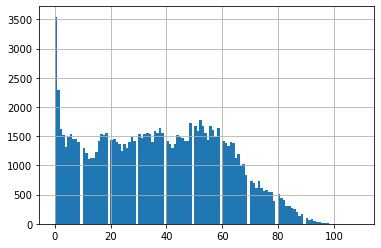

In [36]:
citas['new_age'].hist(bins=120)

In [37]:
citas.to_csv('../data/show_no_show_cleaned.csv')

## Data cleaning

### Estrategia

In [38]:
def cat_column_analysis (df, col):
    
    """
    Dada un columna devuelve información relacionada con nulos y distribución.
    
    Inputs:
    df. datafrme
    col. nombre de la columna
    
    Output:
    -Valores nulos y su ratio si hay.
    -% de cada valor
    -bar plot
    
    """
    
    df_temp = pd.DataFrame(df[col])
    
    #Valores nulos
    if df[col].isnull().sum()>0:  
        print(f"Valores nulos: {df[col].isnull().sum()}. Un {round((df[col].isnull().sum()/len(df[col])*100),2)}%")
        df_temp[col] = df[col].fillna("NaN")
    else:
        print("No hay valores nulos.")
        
    # % según los valores únicos    
    print("Ratio de valores:")
    cd = pd.DataFrame(df_temp[col].value_counts())
    cd["%"] = [round((cd[col][value]/cd[col].sum()),4)*100 for value in cd.index]
    print(cd)
    
    #Visualización de la distribución
    print("Distribución:")
    display(df_temp[col].hist())
    plt.show()
    
    print('\n')
    
    #mostrar el impacto de las distintos valores de la variable en el target (No-show)
    df_temp2 = pd.DataFrame(citas[[col,'no-show']])

    print(f"Impacto de {col} en No-shows:")

    df_temp2 = df_temp2.groupby([col,'no-show']).agg({col:'count'})
    df_temp2['%'] = [round((df_temp2[col][value]/df_temp2[col][df_temp2.index.get_level_values(0)==value[0]].sum())*100,2)
    for value in df_temp2.index]
    print(df_temp2)

    


### Análisis

#### Gender

Valores nulos: 350. Un 0.31%
Ratio de valores:
     gender      %
F     72496  64.68
M     39237  35.01
NaN     350   0.31
Distribución:


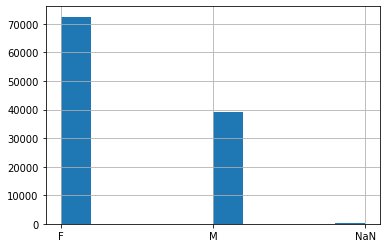



Impacto de gender en No-shows:
                gender      %
gender no-show               
F      No        57759  79.67
       Yes       14737  20.33
M      No        31462  80.18
       Yes        7775  19.82


In [39]:
cat_column_analysis (citas, "gender")

La proporción de valores nulos es pequeña. Al tratarse de una categoria binaria podríamos remplazarlos en proporción a los otros dos valores o crear una nueva categoría de NAs para ver si la gente que no facilita los datos también es la que acabar por no acudir a las citas.

La diferencia es relativamente pequeña pero nos indica que las mujeres son un poco mas propensas a hacer No-shows (no se si es suficientemente significativo cómo para considerarlo)

#### Alcoholism

No hay valores nulos.
Ratio de valores:
          alcoholism      %
None          108521  96.82
Low             1197   1.07
High            1193   1.06
Moderate        1172   1.05
Distribución:


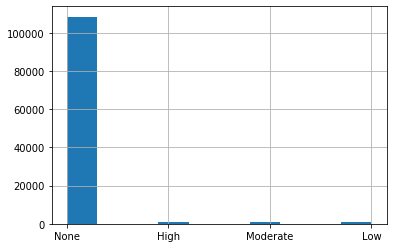



Impacto de alcoholism en No-shows:
                    alcoholism      %
alcoholism no-show                   
High       No              956  80.13
           Yes             237  19.87
Low        No              963  80.45
           Yes             234  19.55
Moderate   No              956  81.57
           Yes             216  18.43
None       No            86606  79.81
           Yes           21915  20.19


In [40]:
cat_column_analysis (citas, "alcoholism")

A pesar de lo que en un principio pensamos que podría ser un atributo categórico binario, haciendo una exploración vemos que es categórico ordinal. Podríamos transformarla a numérico.

A primera vista diríamos que el nivel de alcohlismo no impacta en los No-shows. El 96% de los datos estan dentro del rango None y para High, Low y Moderate la muestra de datos es muy pequeña y aún así muy cercana al valor de los None

#### No-show

In [41]:
#cat_column_analysis (citas, "No-show")

Se me hace un poco raro que el "Sí" sean los que no vienen...

#### Scholarship

No hay valores nulos.
Ratio de valores:
   scholarship     %
0       101094  90.2
1        10989   9.8
Distribución:


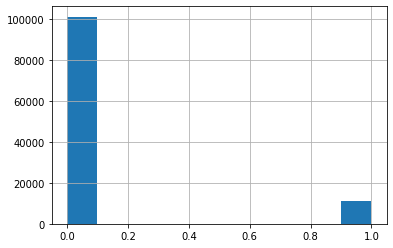



Impacto de scholarship en No-shows:
                     scholarship      %
scholarship no-show                    
0           No             81111  80.23
            Yes            19983  19.77
1           No              8370  76.17
            Yes             2619  23.83


In [42]:
cat_column_analysis (citas,'scholarship')

A pesar de que el porcentaje de Scholarship es bajo (9.83%), es suficiente para poder decir que la gente con Scholarship = 1 son mas propensos a hacer un No-show

No hay valores nulos.
Ratio de valores:
   hipertension      %
0         89874  80.19
1         22209  19.81
Distribución:


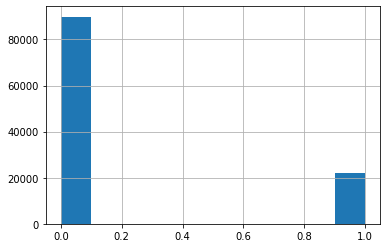



Impacto de hipertension en No-shows:
                      hipertension      %
hipertension no-show                     
0            No              71103  79.11
             Yes             18771  20.89
1            No              18378  82.75
             Yes              3831  17.25


In [43]:
cat_column_analysis (citas,'hipertension')

La gente con hipertension representa un 20% de la muestra con lo que la podemos considerar significativa. Podemos observar que la gente con hipertensión hace menos No-shows que la gente sin.

No hay valores nulos.
Ratio de valores:
   diabetes      %
0    104007  92.79
1      8076   7.21
Distribución:


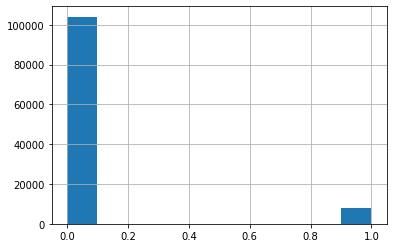



Impacto de diabetes en No-shows:
                  diabetes      %
diabetes no-show                 
0        No          82850  79.66
         Yes         21157  20.34
1        No           6631  82.11
         Yes          1445  17.89


In [44]:
cat_column_analysis (citas,'diabetes')

La gente con Diabetes representa un 7% de la muestra. Podemos observar que la gente con Diabetes hace menos No-shows que la gente sin.

No hay valores nulos.
Ratio de valores:
   handcap      %
0   109767  97.93
1     2111   1.88
2      189   0.17
3       13   0.01
4        3   0.00
Distribución:


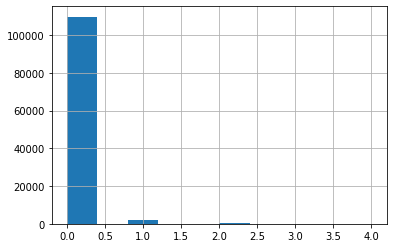



Impacto de handcap en No-shows:
                 handcap      %
handcap no-show                
0       No         87582  79.79
        Yes        22185  20.21
1       No          1737  82.28
        Yes          374  17.72
2       No           150  79.37
        Yes           39  20.63
3       No            10  76.92
        Yes            3  23.08
4       No             2  66.67
        Yes            1  33.33


In [45]:
cat_column_analysis (citas,'handcap')

De las categorias 2, 3 y 4 de Handcap no nos atreveriamos a decir nada ya que la muestra no es significativa. Por otro lado aunque la de Handcap 1 solo representa el ~2% vemos que puede ser significativo su impacto en los No-shows

### PatientId

In [46]:
appointments_per_patient_id = citas.groupby(['patientid']).agg({'appointmentid':'count'})

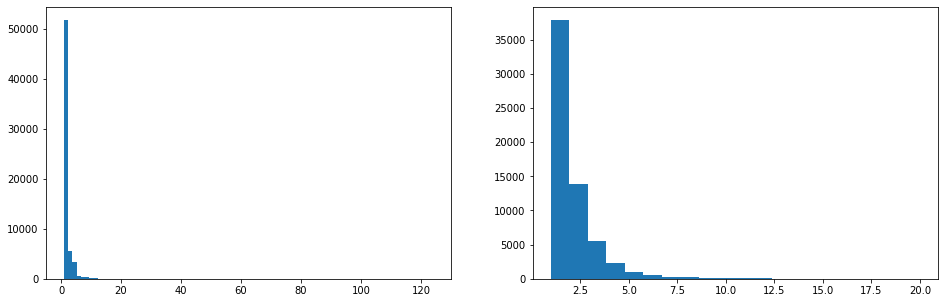

In [47]:
fig, axs = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(16,5)

x1 = appointments_per_patient_id['appointmentid']
x2 = appointments_per_patient_id['appointmentid'][appointments_per_patient_id['appointmentid']<=20]


axs[0].hist(x1, bins=88)
axs[1].hist(x2, bins=20)

plt.show()


### Heatmap

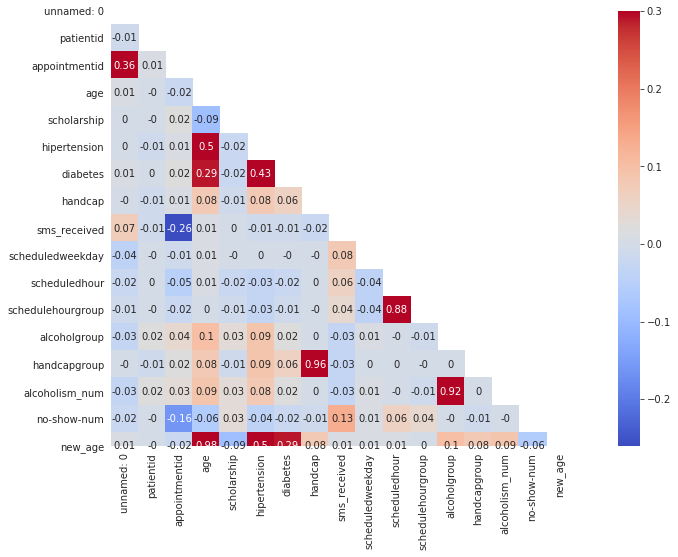

In [48]:
corr = citas.corr().round(2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 8))

    ax = sns.heatmap(corr, cmap = 'coolwarm', annot=True,  mask=mask, vmax=.3, square=True)